# Rotate系
1. Transpose
1. RandomRotate90
1. Rotate
1. ShiftScaleRotate

In [1]:
from albumentations import (
    Transpose,
    RandomRotate90,
    Rotate,
    ShiftScaleRotate,
    )
from utils import *

In [2]:
data = get_data()
image = data['image']
image_seg = data['seg_img']
mask = data['mask']
image_det = data['det_img']
bboxes = data['bboxes']

## Transpose

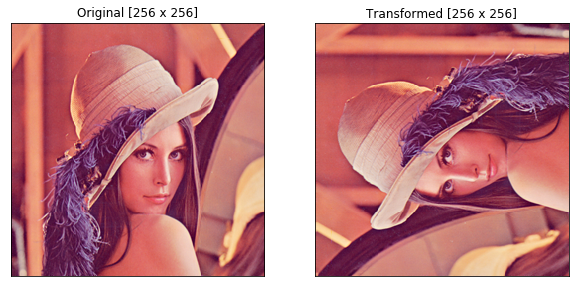

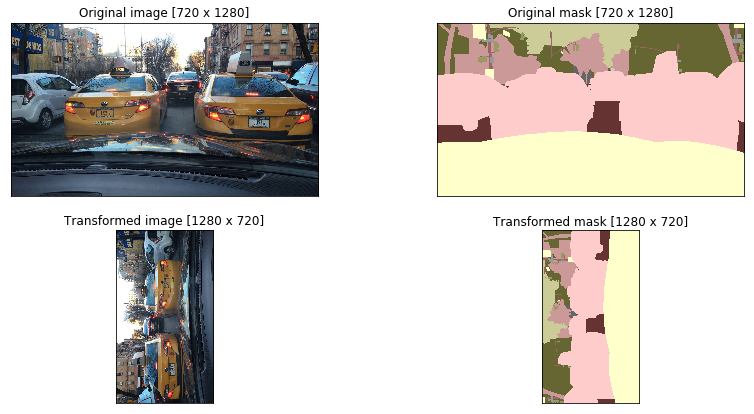

In [3]:
"""Transpose the input by swapping rows and columns.

Args:
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask, bboxes

Image types:
    uint8, float32
"""

trans = Transpose(always_apply=False, p=1)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## RandomRotate90

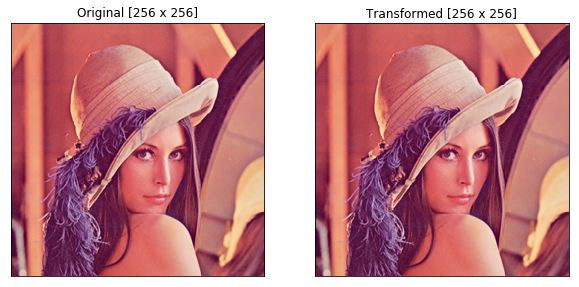

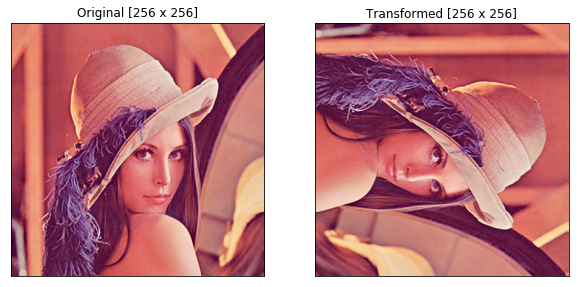

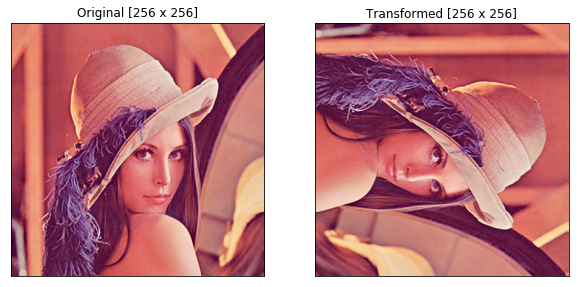

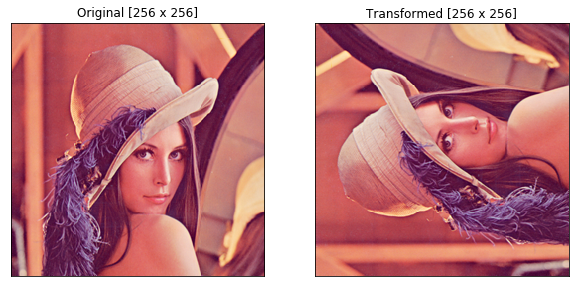

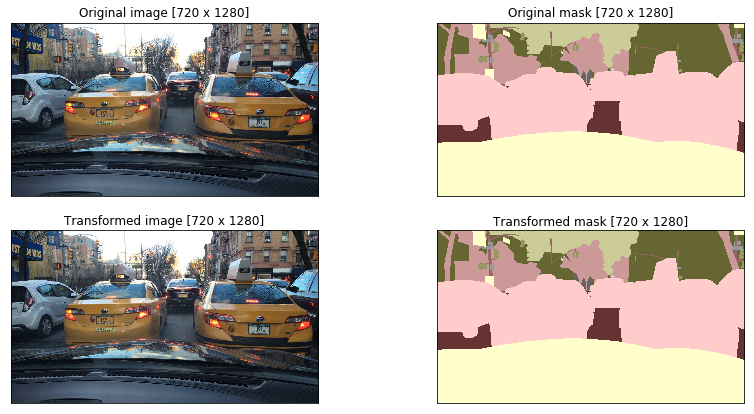

In [4]:
"""Randomly rotate the input by 90 degrees zero or more times.

Args:
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32
    
Comment:
    ランダムに0, 90, 180, 270度回転されます。
"""
trans = RandomRotate90(always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow2(image, transforms=trans)
imshow2(image, transforms=trans)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## Rotate

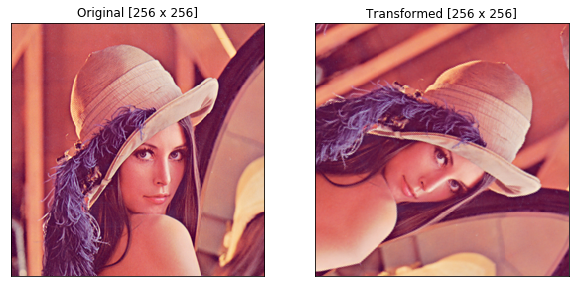

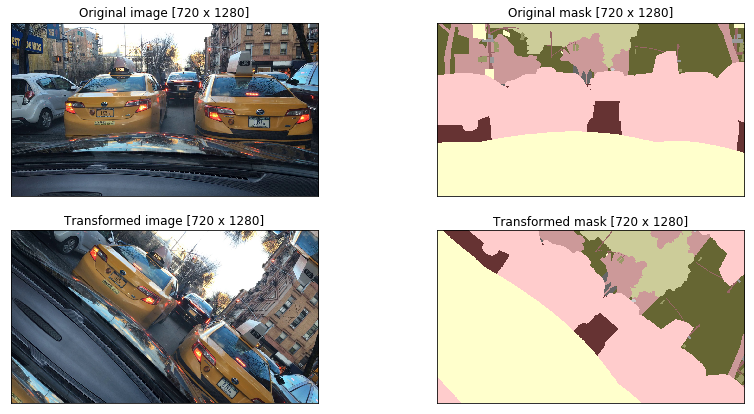

In [5]:
"""Rotate the input by an angle selected randomly from the uniform distribution.

Args:
    limit ((int, int) or int): range from which a random angle is picked. If limit is a single int
        an angle is picked from (-limit, limit). Default: 90
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
        cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
        Default: cv2.BORDER_REFLECT_101
    value (list of ints [r, g, b]): padding value if border_mode is cv2.BORDER_CONSTANT.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32
    
Comment:
    interpolation(拡大アルゴリズム)のフラグは、
        0 : cv2.INTER_NEAREST
        1 : cv2.INTER_LINEAR (default)
        2 : cv2.INTER_CUBIC
        3 : cv2.INTER_AREA
        4 : cv2.INTER_LANCZOS4
    border_modeのフラグは、
        0 : cv2.BORDER_CONSTANT
        1 : cv2.BORDER_REPLICATE
        2 : cv2.BORDER_REFLECT
        3 : cv2.BORDER_WRAP
        4 : cv2.BORDER_REFLECT_101 (default)
"""
trans = Rotate(limit=90, interpolation=1, 
               border_mode=4, value=None, always_apply=False, p=1.0) # interpolation=cv2.INTER_LINEARでもOK
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## ShiftScaleRotate

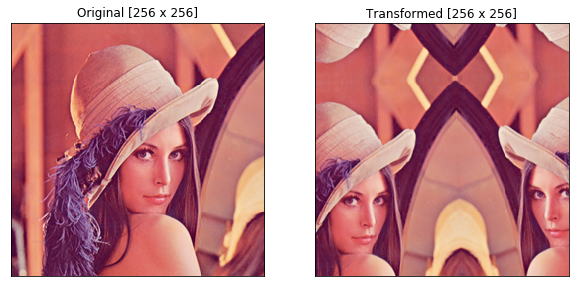

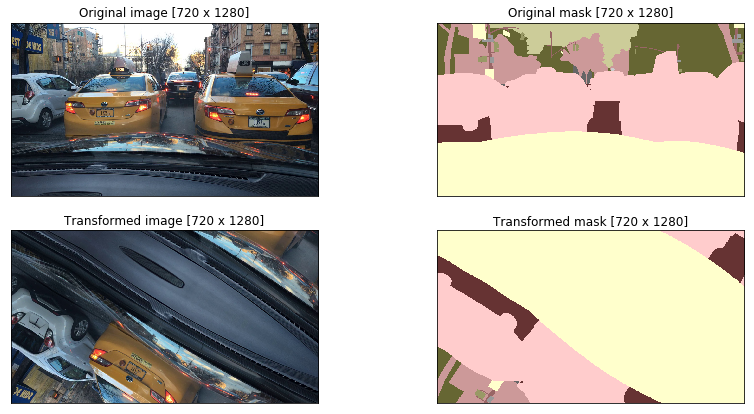

In [6]:
"""Randomly apply affine transforms: translate, scale and rotate the input.

Args:
    shift_limit ((float, float) or float): shift factor range for both height and width. If shift_limit
        is a single float value, the range will be (-shift_limit, shift_limit). Absolute values for lower and
        upper bounds should lie in range [0, 1]. Default: 0.0625.
    scale_limit ((float, float) or float): scaling factor range. If scale_limit is a single float value, the
        range will be (-scale_limit, scale_limit). Default: 0.1.
    rotate_limit ((int, int) or int): rotation range. If rotate_limit is a single int value, the
        range will be (-rotate_limit, rotate_limit). Default: 45.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
        cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
        Default: cv2.BORDER_REFLECT_101
    value (list of ints [r, g, b]): padding value if border_mode is cv2.BORDER_CONSTANT.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask, keypoints

Image types:
    uint8, float32

Comment:
    shift_limitは、画像の横移動(x軸)の割合の範囲。例えば、右にずれれば、ずれて枠から外れた右端部分は左端に移動する。
    scale_limitは、拡大縮小の範囲(負数は縮小割合、整数は拡大割合)。
"""

trans = ShiftScaleRotate(shift_limit=0.5, scale_limit=0.2, rotate_limit=45,
                         interpolation=1, border_mode=4, value=None,
                         always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)